In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df=pd.read_csv('IPL_ball_by_ball_updated.csv')

In [5]:
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5])

In [7]:
df=df[(df.innings==1)|(df.innings==2)]
df.innings.unique()

array([2, 1])

In [8]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
##In order to have an analysis of jasprit bumrah and ab de villers we have to figure this names from the
##dataset in order to work out them. The approach is basically figuring out the team and then
##searching for the striker and the bowler.
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [10]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [11]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [13]:
new_df=df[(df.bowler=='JJ Bumrah') & (df.striker=='AB de Villiers')]

In [14]:
new_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
 sum(new_df.runs_off_bat) ##runs scored

125

In [16]:
len(new_df) ##balls faced

86

In [18]:
len(new_df[new_df.player_dismissed == 'AB de Villers']) ## outs

0

In [19]:
100 *  sum(new_df.runs_off_bat)/len(new_df)  ##strike rate

145.34883720930233

In [20]:
bumrah_df=df[df.bowler == 'JJ Bumrah']

In [22]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
bdf1= pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [24]:
bdf1.head()

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,125
2,AD Nath,4
3,AD Russell,51
4,AJ Finch,24


In [25]:
bdf2= pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()

In [26]:
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,86
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [27]:
bdf3=bdf1.merge(bdf2, on='striker', how='left')

In [28]:
bdf3.head()

,striker,runs_off_bat,ball
0,A Mishra,1,5
1,AB de Villiers,125,86
2,AD Nath,4,4
3,AD Russell,51,41
4,AJ Finch,24,29


In [58]:
bdf3['strike_rate']= 100* bdf3['runs_off_bat']/bdf3['ball']

In [59]:
bdf3.head()

,striker,runs_off_bat,ball,strike rate,strike_rate
1,AB de Villiers,125,86,145.348837,145.348837
3,AD Russell,51,41,124.390244,124.390244
8,AM Rahane,43,35,122.857143,122.857143
9,AR Patel,21,32,65.625000,65.625000
12,AT Rayudu,48,34,141.176471,141.176471


In [60]:
bdf3=bdf3[bdf3.ball>=30]

In [61]:
bdf3.head()

,striker,runs_off_bat,ball,strike rate,strike_rate
1,AB de Villiers,125,86,145.348837,145.348837
3,AD Russell,51,41,124.390244,124.390244
8,AM Rahane,43,35,122.857143,122.857143
9,AR Patel,21,32,65.625000,65.625000
12,AT Rayudu,48,34,141.176471,141.176471


In [62]:
abd_df = df[df.striker =='AB de Villiers']

In [63]:
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [64]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [65]:
adf2= pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [66]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [67]:
adf3=adf1.merge(adf2, on='bowler', how='left')

In [68]:
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [69]:
adf3['strike_rate']= 100* adf3['runs_off_bat']/adf3['ball']

In [70]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [71]:
adf3=adf3[adf3.ball>=30]

In [72]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,39,223.076923
20,AR Patel,71,70,101.428571
32,B Kumar,68,43,158.139535


KeyError: 0

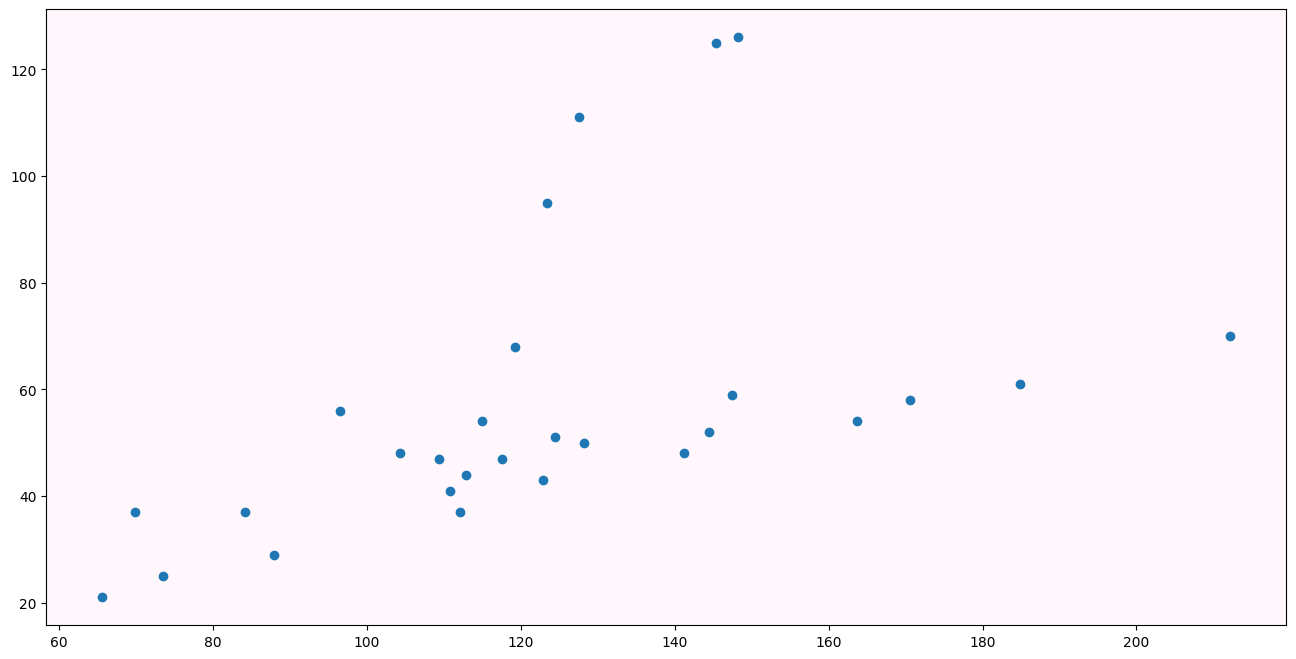

In [74]:
plt.figure(figsize=(16,8))
plt.scatter(bdf3.strike_rate,bdf3.runs_off_bat)
for i in range(len(bdf3)):
  if bdf3['striker'][i]=='V kohli':
    plt.text(bdf3['strike_rate'][i]-7,bdf3['runs_off_bat'][i]-1,bdf3['striker'][i])
  else:
    plt.text(bdf3['strike_rate'][i]+1,bdf3['runs_off_bat'][i]-1,bdf3['striker'][i])

plt.axvline(120, ls='--',color='grey')
plt.axhline(60, ls='--',color='grey')
plt.title('Batsman aganist Bumrah in IPL who faced a minimum of 30 balls',fontsize=20)
plt.xlabel('strike rate')
plt.ylabel('runs scored by the batsmen')
plt.legend()
plt.show()

KeyError: 0

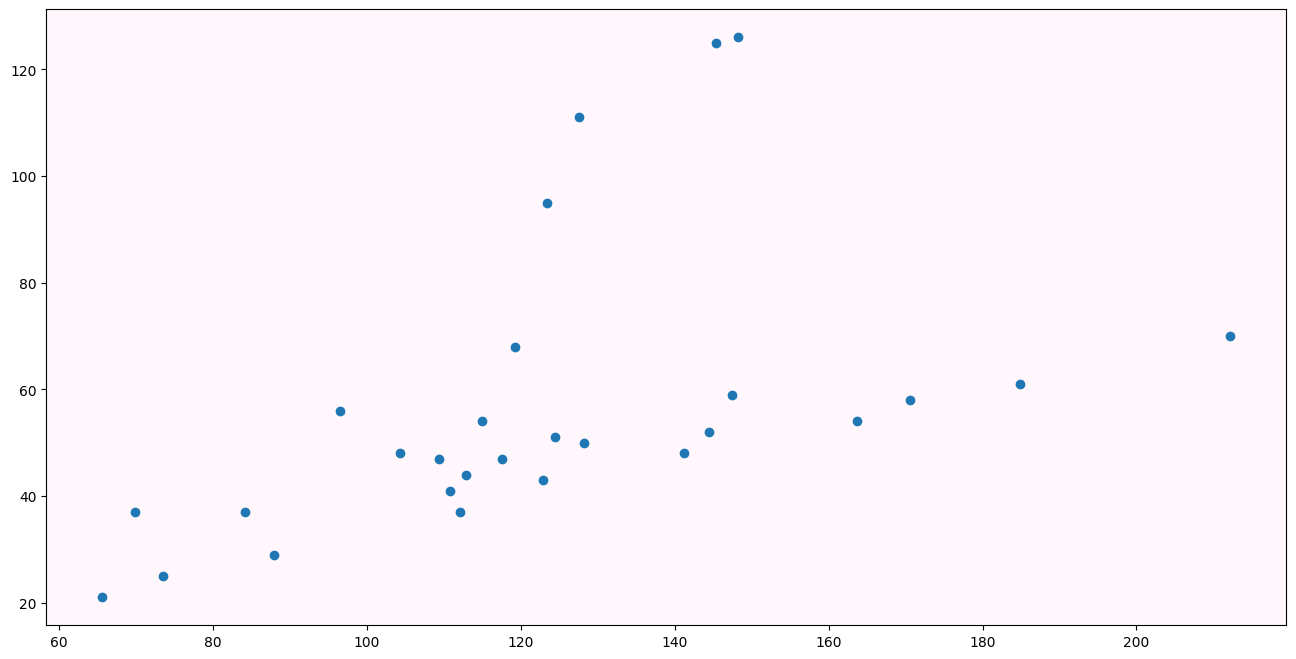

In [75]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)

for i in range(len(bdf3)):
    if bdf3.striker[i] == 'V Kohli':
        plt.text(bdf3.strike_rate[i] - 7, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])
    elif bdf3.striker[i] == 'AB de Villiers':
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i], color = 'maroon')
    elif (bdf3.striker[i] == 'S Dhawan') | (bdf3.striker[i] == 'KL Rahul') | (bdf3.striker[i] == 'JP Duminy'):
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("Best Batman against Bumrah", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part1.jpg')
plt.show()

KeyError: 0

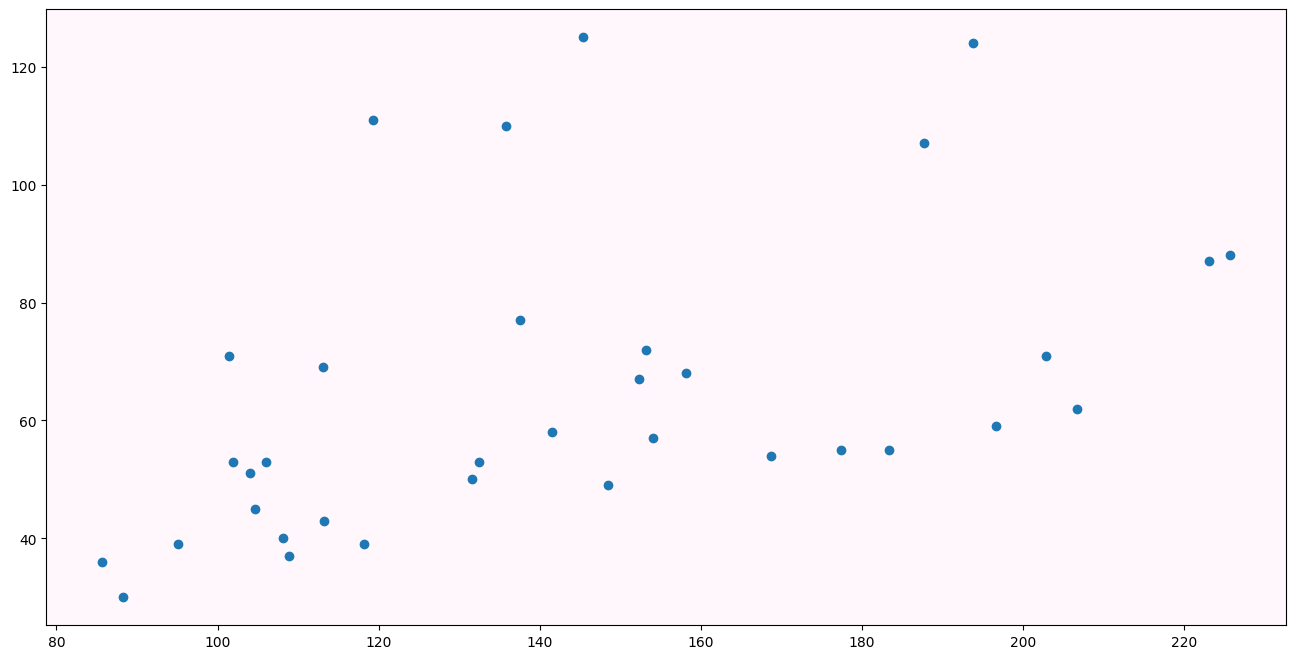

In [76]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)

for i in range(len(adf3)):
    if adf3.bowler[i] == 'JJ Bumrah':
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i] == 'HH Pandya'):
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 2, adf3.bowler[i])
    elif (adf3.bowler[i] == 'AD Russell'):
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()